<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Courses/Sampling_in_Python/Sampling_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling Methods
Key four random sampling methods in Python: simple, systematic, stratified, and cluster.

## Big question

> what's sampling?

> why we need sampling?

# Simple random and systematic sampling

## import needed library and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

attrition_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Courses/Sampling_in_Python/dataset/attrition.csv"
coffee_ratings_full_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Courses/Sampling_in_Python/dataset/coffee_ratings_full.csv"
spotify_2000_2020_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/Courses/Sampling_in_Python/dataset/spotify_2000_2020.csv"

attrition_pop = pd.read_csv(attrition_url)
coffee_ratings_full = pd.read_csv(coffee_ratings_full_url)
spotify_2000_2020 = pd.read_csv(spotify_2000_2020_url)

## Exercise - Simple random sampling

The most basic form of sampling is **Simple Random Sampling (SRS)**. In this method, each row in the dataset has an equal probability of being selected. You’ll use this technique on a fictional employee dataset from IBM, where **"attrition"** refers to employees leaving the company.

You’ll sample 70 rows at random from the full dataset `attrition_pop`.

---

### Instructions

- Use `pd.sample()` to randomly select **70 rows** from `attrition_pop`.
- Set the `random_state` to `18900217` for reproducibility.
- Assign the result to a new DataFrame called `attrition_samp`.
- Print `attrition_samp` and observe the index — note that the original indices are preserved unless reset.


In [3]:
# Sample 70 rows with simple random sampling
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sampled DataFrame
print(attrition_samp)


      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

 Notice how the indexes in the sample aren't always in increasing order. They are just random.

## Exercise - Systematic sampling

**Systematic sampling** is a non-random technique where rows are selected at regular intervals from the population. For example, if you want 70 samples from a dataset with 700 rows, you would select every 10th row (i.e., at intervals of 10).

You’ll apply this method to the `attrition_pop` dataset.


### Big Question:

> What's systematic sampling?

> How to use systematic sampling?

### Instructions 1/2

1. Set the sample size to `70`.
2. Calculate the total population size using `len(attrition_pop)`.
3. Compute the sampling interval by dividing the population size by the sample size and rounding down.


In [4]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

### Instructions 2/2


1. Use slicing with `.iloc` to select every `interval`-th row, starting from index 0.
2. Store the resulting sample in a new DataFrame called `attrition_sys_samp`.

Other approach : Use `np.arange()` to generate row indices starting at 0, increasing by the interval until the end of the dataset.

In [5]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

In [6]:
# # Set the sample size to 70
# sample_size = 70

# # Calculate the population size from attrition_pop
# pop_size = len(attrition_pop)

# # Calculate the interval
# interval = pop_size // sample_size

# # Generate indices and select rows
# indices = np.arange(0, pop_size, interval)
# attrition_sys_samp = attrition_pop.iloc[indices]

## Exercise - Is systematic sampling OK?

While **systematic sampling** is a useful technique, it can introduce bias if the dataset is **sorted** or follows a **pattern**. If there is a structure in the row order, sampling at fixed intervals might not give a representative view of the population.

To check for such issues, you can visualize how a key variable changes with the row order. In this case, you'll look at how `YearsAtCompany` varies with the index.



### Instructions 1/3

1. Add a new column named `index` to the `attrition_pop` DataFrame to track the original row positions. Save the result as `attrition_pop_id`.
2. Use a **scatter plot** `.plot()` to visualize the relationship between `YearsAtCompany` and the new `index` column. This will help identify if there's any visible pattern in the data order.

```python
# Step 1: Add index column
attrition_pop_id = attrition_pop.copy()
attrition_pop_id['index'] = attrition_pop.index

# Step 2: Plot YearsAtCompany vs index
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()
```

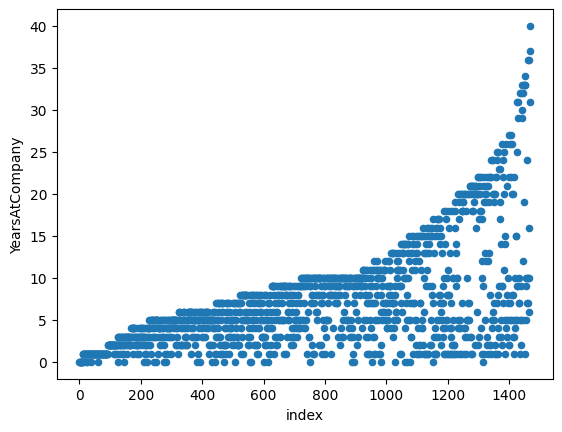

In [7]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

### ✅ Which one to use? `reset_index()` or `.index`

* If your index is meaningful (e.g., Employee IDs), use `reset_index()`.

* If you just need the current index for plotting but don’t want to alter the structure, use `attrition_pop.index`.

### Instructions 2/3 - Shuffle and re-plot

To determine whether **systematic sampling** introduces bias due to row order, you'll now **randomly shuffle** the dataset and compare the new scatter plot to the previous one.

---

**Steps:**

1. Randomly shuffle the rows of `attrition_pop` using `.sample(frac=1)`.
2. Reset the index of the shuffled DataFrame to ensure clean indexing.
3. Add an `index` column to the shuffled DataFrame for plotting.
4. Create a scatter plot of `YearsAtCompany` vs. the new index.


In [8]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

In [9]:
# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

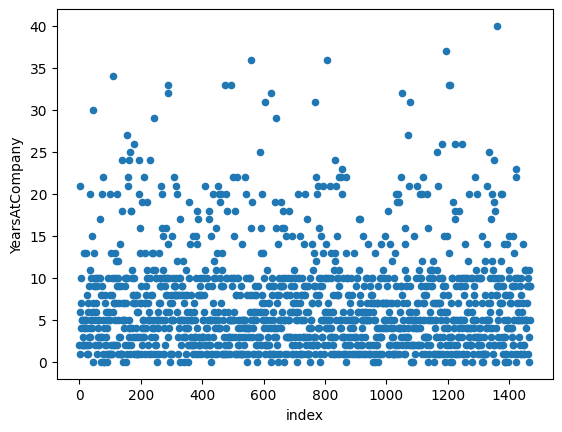

In [10]:
# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

### Instructions (3/3) - Question

Does a systematic sample always produce a sample similar to a simple random sample?

---

**Possible answers**

- Yes. All sampling (random or non-random) methods will lead us to similar results.  
- Yes. We should always expect a representative sample for both systematic and simple random sampling.  
- No. This only holds if a seed has been set for both processes.  
- **No. This is not true if the data is sorted in some way.** ✅  


## Well done! 🎉

You've just learned that **systematic sampling** can be problematic **when the dataset is sorted or contains a pattern**. In such cases, the sample may not be representative of the population.

👉 Key takeaway:  

To avoid bias, **shuffle the data** before applying systematic sampling. Once shuffled, **systematic sampling behaves just like simple random sampling**.

Keep up the great work — your sampling skills are solid! 💪

### Big question

>How to shuffled?
  * using `.sample(frac=1)` method:
    * `frac` stands for "fraction".
    * `frac=1` means you're sampling 100% of the data — all the rows — but in random order.
    * It's the standard way to shuffle a DataFrame.



>How shuffled works?

>What happend after Shuffeld?

# Stratified and weighted random sampling


### ❓ The **main problem** this course tackles is:
> we create representative samples from a population dataset to support fair and unbiased data analysis?

### ⚠️ Why this matters:
* Simple random samples may **misrepresent small groups** due to chance.
* Group analysis may become **inaccurate** if certain subgroups are under- or over-sampled.
* In **real-world applications** like polling, surveys, or machine learning training data, **biased samples lead to bad decisions** or incorrect models.

### 🔍 Common Sampling Problems and Solutions

| 🧩 Problem                                                              | ✅ Solution / Sampling Method                  |
|------------------------------------------------------------------------|-----------------------------------------------|
| Some subgroups (e.g., countries) appear too much or too little         | **Stratified Sampling** – keeps proportions intact |
| Want equal representation from each subgroup                          | **Equal Counts Stratified Sampling** – fixed count per group |
| Need to over-sample or under-sample specific subgroups (e.g., Taiwan) | **Weighted Random Sampling** – custom sampling weights |
| Systematic sampling may align with data patterns                      | **Shuffle before Systematic Sampling** – avoid bias |
| Want to sample only a few entire subgroups (e.g., only 2 varieties)   | **Cluster Sampling** – pick entire subgroups at random |



## Exercise - Which sampling method?

You've explored multiple sampling methods, such as **Simple Random Sampling** and **Stratified Sampling**. Now it’s time to test your understanding of when to use each method appropriately.




### Instructions

Match the situation with the **most suitable sampling method**.

---

**1. You want to ensure each subgroup (e.g., departments in a company) is represented proportionally in the sample.**  
✅ **Stratified Sampling**

---

**2. You want a quick sample and each row has an equal chance of being selected.**  
✅ **Simple Random Sampling**

---

**3. You suspect there's a pattern in the dataset and want to reduce the risk of bias.**  
✅ **Simple Random Sampling**

---

**4. You are analyzing opinions in different age groups and want equal representation from each age group.**  
✅ **Stratified Sampling**

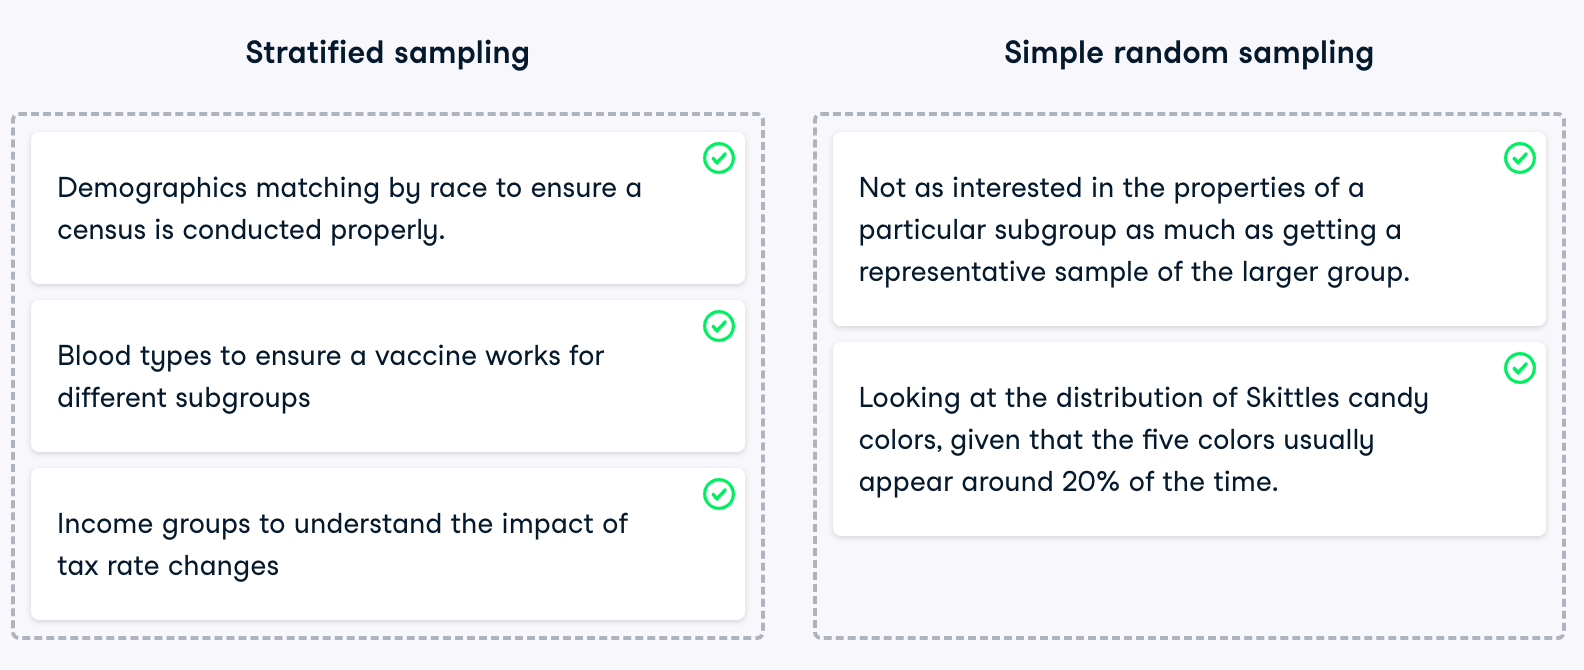

## 📋 Sampling Methods Comparison

| **Method**         | **When to Use**                                           | **Strength**                                                  |
|--------------------|-----------------------------------------------------------|---------------------------------------------------------------|
| **Simple Random**  | - Uniform population<br>- Quick, general-purpose sampling | Easy to implement<br> Fast and straightforward            |
| **Stratified**     | - Population has meaningful subgroups (strata)<br>- You want to preserve subgroup proportions |  Better representation<br> Enables subgroup comparisons     |
| **Weighted**       | - Need to over/under-sample certain groups<br>- Adjust for imbalance or bias |  Highly flexible<br> Great for correcting sampling bias     |



Hint:
Use stratified sampling when you care about subgroups within the population, and simple random sampling otherwise.

Classy classification! Stratified sampling is useful if you care about subgroups. Otherwise, simple random sampling is more appropriate.

## Exercise - Proportional stratified sampling

When analyzing subgroups within a population, **proportional stratified sampling** ensures each subgroup is represented in the **same proportion** as it appears in the full population. It’s like running a simple random sample **within each subgroup**.

You’ll apply this to the `attrition_pop` dataset by first checking the distribution of employees across education levels.



### Instructions 1/3

* Get the proportion of employees by `Education` level from `attrition_pop`.


In [11]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop["Education"].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


### Instructions 2/3 - Proportional stratified sampling

Now that you know the proportions of each `Education` level in the population, it's time to perform **proportional stratified sampling**. You’ll sample **40% of each `Education` subgroup**, using a fixed random seed for reproducibility.

---

### Steps:

- Use `.groupby()` on `Education`.
- Apply `.sample(frac=0.4, random_state=2022)` to each group.
- Combine the results into one DataFrame.

In [12]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education")\
    .sample(frac=0.4, random_state=2022)


# Print the sample
print(attrition_strat)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1190   38        0.0      Travel_Rarely       1495  Research_Development   
364    34        0.0      Travel_Rarely        304                 Sales   
1343   45        0.0  Travel_Frequently       1249  Research_Development   
147    35        0.0      Travel_Rarely        802  Research_Development   
1370   46        0.0      Travel_Rarely       1319                 Sales   
...   ...        ...                ...        ...                   ...   
1230   46        0.0      Travel_Rarely        717  Research_Development   
502    36        0.0      Travel_Rarely        559  Research_Development   
1276   43        0.0      Travel_Rarely        782  Research_Development   
406    35        0.0      Travel_Rarely       1402                 Sales   
1141   34        1.0      Travel_Rarely        790                 Sales   

      DistanceFromHome Education    EducationField EnvironmentSatisfaction  \
1190     

### Instructions 3/3 - Check proportions in the sample

Now that you’ve performed **proportional stratified sampling**, verify that the **distribution of `Education` levels** in your sample matches the distribution in the full population.


In [13]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


## Perfectly proportioned! ✅

Great job! By using **grouping followed by sampling**, you successfully performed **proportional stratified sampling**. This ensures that:

👉 The **size of each subgroup** in your sample reflects its **proportion in the full population**.

This approach is especially useful when you want to analyze subgroups fairly without introducing bias from over- or under-represented groups.

Keep it up — you're mastering sampling techniques like a pro! 💡

## Exercise - Equal counts stratified sampling

Sometimes you want to **analyze each subgroup equally**, even if their sizes differ in the population. That’s where **equal counts stratified sampling** comes in — it selects the same number of samples from each subgroup.

In this case, you’ll sample **30 employees** from **each `Education` group**, regardless of how many employees are in each group overall.


### Instructions 1/2

- Use `.groupby()` on the `Education` column.
- Apply `.sample(n=30, random_state=2022)` to each group.


In [14]:
# Equal counts stratified sampling: 30 from each Education level
attrition_eq = attrition_pop.groupby("Education")\
    .sample(n=30, random_state=2022)

# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1190   38        0.0      Travel_Rarely       1495  Research_Development   
364    34        0.0      Travel_Rarely        304                 Sales   
1343   45        0.0  Travel_Frequently       1249  Research_Development   
147    35        0.0      Travel_Rarely        802  Research_Development   
1370   46        0.0      Travel_Rarely       1319                 Sales   
...   ...        ...                ...        ...                   ...   
667    37        0.0      Travel_Rarely        342                 Sales   
33     30        1.0  Travel_Frequently        448                 Sales   
1198   51        1.0      Travel_Rarely       1323  Research_Development   
560    38        0.0      Travel_Rarely        243                 Sales   
330    34        0.0  Travel_Frequently        303                 Sales   

      DistanceFromHome Education    EducationField EnvironmentSatisfaction  \
1190     

### Instructions 2/2  - Check equal group proportions

Now that you've sampled **30 employees per Education level**, let's confirm the result by examining the proportions.

Since each group has the same count, the proportions across `Education` levels should now be **evenly distributed**.

---

### Hint:

- Use `.value_counts(normalize=True)` on the `Education` column of `attrition_eq`.

In [15]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq["Education"].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Education
Bachelor         0.2
Below_College    0.2
College          0.2
Doctor           0.2
Master           0.2
Name: proportion, dtype: float64


## Elegant equal count creation! 🎯

Well done! You've successfully applied **equal counts stratified sampling** — a great technique when you want each subgroup to have **equal weight** in your analysis, regardless of its actual size in the population.

✅ This method is especially useful when comparing subgroups fairly, such as in classification models or balanced survey analysis.

You're getting sharper with every sample! 📊 Keep going!

## Exercise - Weighted Sampling

**Weighted sampling** is a generalization of **stratified sampling**. While stratified sampling sets probabilities at the subgroup level, weighted sampling allows you to control the probability of selecting each individual row. The selection probability is **proportional to a specified weight value** for each row.

In this exercise, you'll work with the `attrition_pop` dataset.

The libraries `pandas`, `matplotlib.pyplot`, and `numpy` are already imported using their usual aliases.



### **Instructions 1/4**

**Goal**: Plot the `YearsAtCompany` column from `attrition_pop` as a histogram.

- Use **bin width of 1**
- Range should go **from 0 to 40**


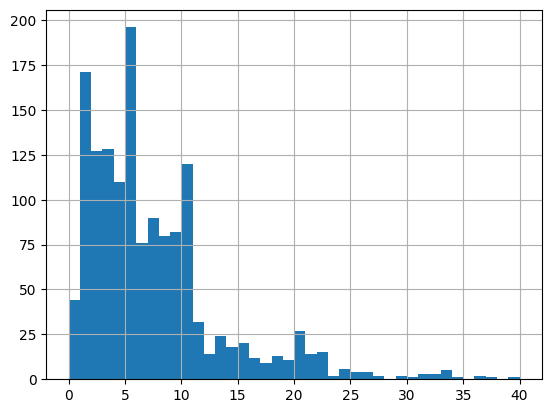

In [16]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

### **Instructions 2/4**

- Sample 400 employees from attrition_pop weighted by YearsAtCompany.


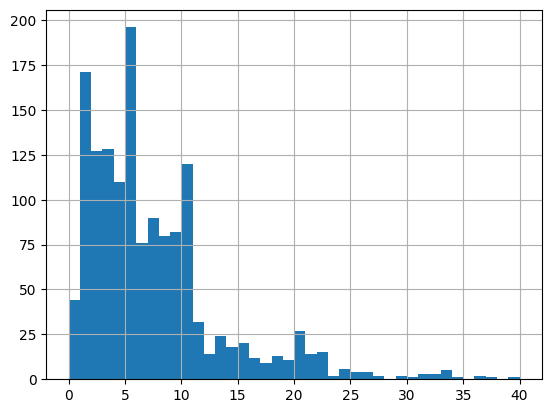

      Age  Attrition     BusinessTravel  DailyRate            Department  \
922    31        0.0         Non-Travel        325  Research_Development   
202    33        0.0  Travel_Frequently        970                 Sales   
31     26        1.0      Travel_Rarely        471  Research_Development   
1127   36        0.0  Travel_Frequently        541                 Sales   
590    39        0.0      Travel_Rarely       1498                 Sales   
...   ...        ...                ...        ...                   ...   
1176   36        0.0      Travel_Rarely        363  Research_Development   
155    35        0.0      Travel_Rarely        992  Research_Development   
203    27        0.0      Travel_Rarely        199  Research_Development   
214    22        0.0         Non-Travel        457  Research_Development   
1218   46        0.0      Travel_Rarely       1485  Research_Development   

      DistanceFromHome Education    EducationField EnvironmentSatisfaction  \
922      

In [17]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights='YearsAtCompany')

# Print the sample
print(attrition_weight)

### **Instructions 3/4**

- Plot YearsAtCompany from attrition_weight as a histogram with bins of width 1 from 0 to 40.

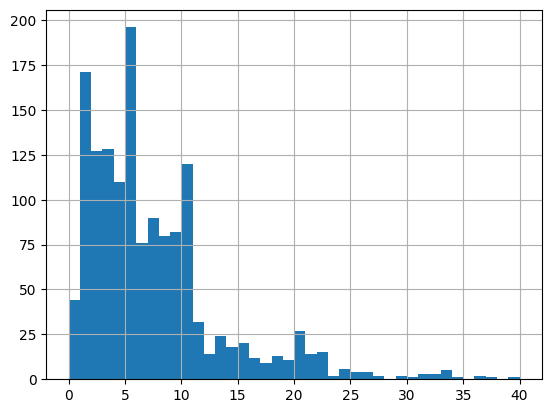

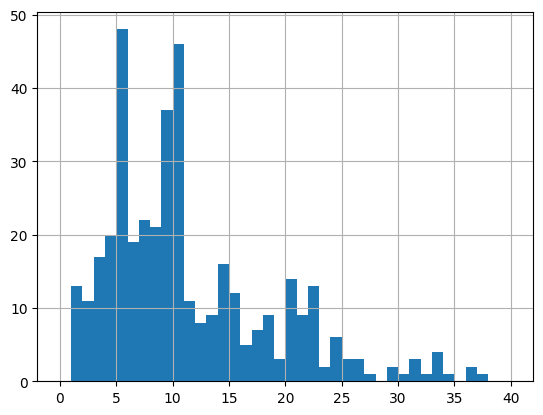

In [18]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins= np.arange(0, 41,1))
plt.show()

**Code Explanation** :

bins=np.arange(0, 41, 1): The bins parameter specifies the bin edges for the histogram. Here, np.arange(0, 41, 1) is used to create an array of numbers starting from 0 up to 40, with a step of 1. This means each bin will have a width of 1, which matches the requirement of having bins of width 1 from 0 to 40.



### Better approach - Enhance Visualization
To compare the YearsAtCompany distribution of both attrition_pop and the sampled attrition_weight in a single histogram, you can plot them together using transparency (alpha) to distinguish them.

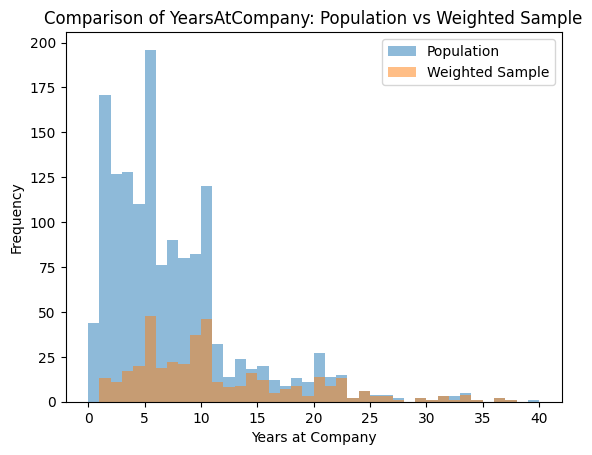

In [19]:
# Define bins
bins = np.arange(0, 41, 1)

# Plot both histograms in the same figure
plt.hist(attrition_pop['YearsAtCompany'], bins=bins, alpha=0.5, label='Population')
plt.hist(attrition_weight['YearsAtCompany'], bins=bins, alpha=0.5, label='Weighted Sample')

# Add legend and labels
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.title('Comparison of YearsAtCompany: Population vs Weighted Sample')
plt.legend()

plt.show()

### **Instructions 4/4**

**Question**: Which is higher — the **mean `YearsAtCompany`** from `attrition_pop` or from `attrition_weight`?

You are comparing:

- `attrition_pop`: the **full population** dataset
- `attrition_weight`: a **weighted sample** of that population

---

### **Possible Answers**

- ✅ `Population mean.`  
- `Both means are identical.`  
- `Sample mean.`  
- `It is impossible to calculate the two means.`

The **population mean** is higher because the weighted sample gives higher selection probability to rows with lower `YearsAtCompany`, pulling the sample mean downward.


# Cluster sampling


## Selection - Benefits of Clustering

**Cluster sampling** is a two-stage technique similar to stratified sampling:

1. **Randomly select** which subgroups (clusters) to include.
2. **Randomly sample** individuals within those selected clusters.

---

### **Question**

In which situation is **cluster sampling** preferable to **stratified sampling**?


> 1. The interest is on ensuring each rare group will be represented in the sample selected.

> 2. Cost is not a limitation, and time can be spent carefully sampling from each group in the population.

> 3. Collecting an overall sample requires lots of travel from one group to another to collect samples within each group.

> 4. The focus is on comparing particular subgroups within the population.


---

### ✅ **Correct Answer**

> 3. **Collecting an overall sample requires lots of travel from one group to another to collect samples within each group.**  

Cluster sampling is ideal when:

- Reducing **costs** and **logistical effort** is important.
- Sampling **entire clusters in one go** is more practical than reaching many scattered individuals.

---

### Other Options (for reference):

- **Option 1**: Best suited for *stratified sampling* to ensure rare groups are included.
- **Option 2**: Favors *stratified sampling*, since resources allow detailed, proportional selection.
- **Option 4**: Also aligns with *stratified sampling*, focusing on subgroup comparisons.


### 🎯 Delightful Decision-Making!

Delightful decision-making! The main benefit of cluster sampling over stratified sampling is that you can save time and money by not including every subgroup in your sample.

## Exercise - Performing Cluster Sampling

Now that you're familiar with when to apply **cluster sampling**, it's time to practice it. In this task, you'll work with the `JobRole` column from the `attrition` dataset. Think of each `JobRole` as a **distinct subgroup** within the overall employee population.

The dataset `attrition_pop` is already available. The **pandas** library is imported (as `pd`), and the **random** module is also loaded. A random seed has been set using `random.seed(19790801)` to ensure reproducibility.


---

### Instructions (1/3)

**Goal**:  
- Create a list of unique `JobRole` values from `attrition_pop`, and assign it to `job_roles_pop`.  
- Randomly sample **four** job roles from `job_roles_pop`.

You’ll be performing **cluster sampling** by selecting a subset of job roles to represent groups within the larger population.


In [20]:
# Create a list of unique JobRole values
job_roles_pop =list(attrition_pop['JobRole'].unique())
print(job_roles_pop)

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Print the result
print(job_roles_samp)

['Research_Scientist', 'Sales_Representative', 'Laboratory_Technician', 'Human_Resources', 'Sales_Executive', 'Manufacturing_Director', 'Healthcare_Representative', 'Research_Director', 'Manager']
['Human_Resources', 'Research_Director', 'Laboratory_Technician', 'Manager']


### Instructions (2/3)

Now that you've selected your sample of job roles in `job_roles_samp`, the next step is to **filter the original population** dataset based on these roles.

**Goal**:  
- Subset `attrition_pop` to include only the rows where `JobRole` is in the `job_roles_samp` list.  
- Assign the result to a new DataFrame.

This step narrows down the population to the sampled clusters (job roles) for further analysis.


In [21]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
2      18        1.0      Travel_Rarely        230  Research_Development   
7      18        1.0         Non-Travel        247  Research_Development   
8      18        0.0         Non-Travel       1124  Research_Development   
11     30        0.0      Travel_Rarely       1358  Research_Development   
12     22        0.0         Non-Travel       1123  Research_Development   
...   ...        ...                ...        ...                   ...   
1458   56        0.0  Travel_Frequently        906                 Sales   
1459   54        0.0      Travel_Rarely        685  Research_Development   
1467   58        0.0      Travel_Rarely        682                 Sales   
1468   58        1.0      Travel_Rarely        147  Research_Development   
1469   58        1.0      Travel_Rarely        286  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
2      

### Instructions (3/3)

With the filtered dataset ready, you'll now finalize your cluster sampling by selecting samples within each chosen job role.

**Goals**:  
1. **Remove any unused categories** from the `JobRole` column in the filtered dataset using `.cat.remove_unused_categories()`.  
2. For **each job role**, randomly sample **10 rows**.  
   - Use `groupby()` on `JobRole`.  
   - Apply `.sample(n=10, random_state=2022)` to ensure reproducibility.

This step completes the cluster sampling process by taking equal-sized samples from each selected cluster (job role).


In [22]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Convert JobRole column to 'category' dtype.
# In the Datacamp environment, the column might already be set as a category, but locally it's likely of type object.
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].astype('category')

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole")\
        .sample(n=10, random_state=2022)


# Print the sample
print(attrition_clust)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1124   36        0.0      Travel_Rarely       1396  Research_Development   
576    45        0.0      Travel_Rarely        974  Research_Development   
995    42        0.0  Travel_Frequently        748  Research_Development   
1243   50        0.0      Travel_Rarely       1207  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
599    33        0.0      Travel_Rarely       1099  Research_Development   
117    24        0.0      Travel_Rarely        350  Research_Development   
472    30        0.0      Travel_Rarely        921  Research_Development   
149    27        0.0         Non-Travel       1277  Research_Development   
49     20        1.0      Travel_Rarely        129  Research_Development   
1380   44        0.0      Travel_Rarely       1099                 Sales   
1285   39        0.0      Travel_Rarely        412  Research_Development   
1294   39   

<ipython-input-22-7561a4351a82>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].astype('category')
<ipython-input-22-7561a4351a82>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
<ipython-input-22-7561a4351a82>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

# Comparing sampling methods


## Exercise - 3 Types of Sampling

You're going to compare how point estimates perform across three sampling methods: **simple random sampling**, **stratified sampling**, and **cluster sampling**.

You’ll work with the `RelationshipSatisfaction` column from the `attrition_pop` dataset, which represents how satisfied employees are with their relationship to the company. It has four levels: `Low`, `Medium`, `High`, and `Very_High`.

Both `pandas` (as `pd`) and `random` have already been imported for you.



## Instructions 3/3


### 1. Simple Random Sampling
- Select **25%** of the total rows from `attrition_pop` using **simple random sampling**.
- Use the seed **2022** to ensure reproducibility.

In [23]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)
attrition_srs

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
186,37,0.0,Travel_Rarely,1225,Research_Development,10,College,Life_Sciences,Very_High,Male,...,Excellent,Low,0,4,2,Better,1,0,0,0
743,34,0.0,Travel_Frequently,1069,Research_Development,2,Below_College,Life_Sciences,Very_High,Male,...,Excellent,High,0,10,2,Good,10,9,1,9
414,37,0.0,Travel_Frequently,1278,Sales,1,Master,Medical,High,Male,...,Excellent,High,2,6,2,Good,6,3,1,3
1383,44,0.0,Travel_Rarely,1199,Research_Development,4,College,Life_Sciences,High,Male,...,Excellent,Very_High,2,26,4,Good,25,9,14,13
850,35,0.0,Travel_Frequently,200,Research_Development,18,College,Life_Sciences,High,Male,...,Excellent,High,0,10,2,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,22,1.0,Travel_Rarely,617,Research_Development,3,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,4,3,Best,3,2,0,2
659,27,0.0,Travel_Rarely,975,Research_Development,7,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,9,2,Bad,7,6,0,7
873,39,0.0,Travel_Rarely,1387,Research_Development,10,Doctor,Medical,Medium,Male,...,Excellent,Very_High,3,10,3,Better,7,7,7,7
637,34,0.0,Travel_Rarely,629,Research_Development,27,College,Medical,Very_High,Female,...,Excellent,Very_High,0,9,3,Better,3,2,1,2


### 2. Stratified Sampling
- Perform **stratified sampling** by selecting **25%** of rows from **each level** of `RelationshipSatisfaction`.
- Use the seed **2022** for reproducibility.


In [24]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction")\
.sample(frac=0.25, random_state=2022)
attrition_strat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
20,22,0.0,Travel_Rarely,534,Research_Development,15,Bachelor,Medical,Medium,Female,...,Excellent,High,0,1,5,Better,0,0,0,0
1068,42,0.0,Travel_Rarely,419,Sales,12,Master,Marketing,Medium,Male,...,Excellent,High,2,14,4,Better,0,0,0,0
620,40,0.0,Travel_Rarely,543,Research_Development,1,Master,Life_Sciences,Low,Male,...,Excellent,High,2,8,3,Good,1,0,0,0
1129,54,0.0,Travel_Rarely,397,Human_Resources,19,Master,Medical,High,Male,...,Excellent,High,1,16,1,Best,9,7,7,1
1213,56,0.0,Travel_Rarely,713,Research_Development,8,Bachelor,Life_Sciences,High,Female,...,Excellent,High,1,19,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,27,0.0,Travel_Rarely,608,Research_Development,1,College,Life_Sciences,High,Female,...,Excellent,Very_High,0,9,3,Better,9,7,0,7
1333,55,0.0,Travel_Rarely,282,Research_Development,2,College,Medical,Very_High,Female,...,Excellent,Very_High,1,23,5,Better,19,9,9,11
1457,55,0.0,Travel_Rarely,692,Research_Development,14,Master,Medical,High,Male,...,Excellent,Very_High,0,36,3,Better,24,15,2,15
890,30,0.0,Travel_Frequently,1312,Research_Development,2,Master,Technical_Degree,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,9,7,0,7


### 3. Cluster Sampling
- Create a list of the unique values in the `RelationshipSatisfaction` column.
- Randomly select **2** values from this list.
- Subset `attrition_pop` to include only rows where `RelationshipSatisfaction` is in the selected values.
- Remove any unused categories from the `RelationshipSatisfaction` column and assign the result to `attrition_clust_prep`.
- From this subset, perform **simple random sampling** to select **25%** of the rows using the seed **2022**.

In [33]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

satisfaction_samp


['Very_High', 'High']

since we need to mimic datacamp environment, we intensionally set `satisfaction_samp` as `['High', 'Very_High']`

In [35]:
# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition].astype('category')
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\
    .sample(n=len(attrition_pop) // 4, random_state=2022)
attrition_clust

<ipython-input-35-b4c8392674e0>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
20,22,0.0,Travel_Rarely,534,Research_Development,15,Bachelor,Medical,Medium,Female,...,Excellent,High,0,1,5,Better,0,0,0,0
1068,42,0.0,Travel_Rarely,419,Sales,12,Master,Marketing,Medium,Male,...,Excellent,High,2,14,4,Better,0,0,0,0
620,40,0.0,Travel_Rarely,543,Research_Development,1,Master,Life_Sciences,Low,Male,...,Excellent,High,2,8,3,Good,1,0,0,0
1129,54,0.0,Travel_Rarely,397,Human_Resources,19,Master,Medical,High,Male,...,Excellent,High,1,16,1,Best,9,7,7,1
1213,56,0.0,Travel_Rarely,713,Research_Development,8,Bachelor,Life_Sciences,High,Female,...,Excellent,High,1,19,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,34,0.0,Travel_Rarely,404,Research_Development,2,Master,Technical_Degree,High,Female,...,Excellent,Very_High,0,14,2,Best,14,11,4,11
1412,54,0.0,Travel_Rarely,971,Research_Development,1,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,0,29,3,Good,20,7,12,7
148,33,0.0,Non-Travel,1038,Sales,8,Below_College,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,3,2,Good,2,2,2,2
859,34,0.0,Travel_Rarely,971,Sales,1,Bachelor,Technical_Degree,Very_High,Male,...,Excellent,Very_High,0,10,3,Better,10,9,8,6


Possible Error:

```
ValueError: Cannot take a larger sample than population when 'replace=False'

```
The error message "ValueError: Cannot take a larger sample than population when 'replace=False'" indicates that you're trying to sample more elements from a group within your data than there are elements available in that group, without replacement.



In [27]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition].astype('category')
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of the *cluster size*
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\
.sample(frac=0.25, random_state=2022) # Changed to frac=0.25 to sample a fraction of each cluster

attrition_clust

<ipython-input-27-3ffca6b5de77>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
20,22,0.0,Travel_Rarely,534,Research_Development,15,Bachelor,Medical,Medium,Female,...,Excellent,High,0,1,5,Better,0,0,0,0
1068,42,0.0,Travel_Rarely,419,Sales,12,Master,Marketing,Medium,Male,...,Excellent,High,2,14,4,Better,0,0,0,0
620,40,0.0,Travel_Rarely,543,Research_Development,1,Master,Life_Sciences,Low,Male,...,Excellent,High,2,8,3,Good,1,0,0,0
1129,54,0.0,Travel_Rarely,397,Human_Resources,19,Master,Medical,High,Male,...,Excellent,High,1,16,1,Best,9,7,7,1
1213,56,0.0,Travel_Rarely,713,Research_Development,8,Bachelor,Life_Sciences,High,Female,...,Excellent,High,1,19,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,35,0.0,Travel_Rarely,1402,Sales,28,Master,Life_Sciences,Medium,Female,...,Outstanding,Low,2,6,5,Better,5,3,4,2
854,31,1.0,Travel_Frequently,1445,Research_Development,1,Doctor,Life_Sciences,High,Female,...,Excellent,Low,0,10,2,Better,10,8,4,7
869,45,0.0,Travel_Rarely,1015,Research_Development,5,Doctor,Medical,High,Female,...,Excellent,Low,0,10,3,Better,10,7,1,4
1296,39,0.0,Travel_Rarely,722,Sales,24,Below_College,Marketing,Medium,Female,...,Excellent,Low,1,21,2,Good,20,9,9,6


### Explanation of Changes:

Sampling a Fraction: Instead of sampling a fixed number (n) of rows from each cluster, we've changed the sampling method to use frac=0.25. This means you'll sample 25% of the rows within each cluster (each unique RelationshipSatisfaction group).
Avoiding the Error: By sampling a fraction, you ensure that you never try to take a sample larger than the cluster size, preventing the ValueError.

## Exercise - Comparing Point Estimates

With your **three different sampling methods** complete — *simple random*, *stratified*, and *cluster* — it's time to compare their point estimates against the **population parameter**.

In this task, you'll investigate how **relationship satisfaction** influences whether an employee leaves the company. Specifically, you'll compute the **proportion of attrition** (`Attrition == 1`) for each `RelationshipSatisfaction` level across:

- The **full population** (`attrition_pop`)
- A **simple random sample** (`attrition_srs`)
- A **stratified sample** (`attrition_strat`)
- A **cluster sample** (`attrition_clust`)


### Instructions 1/4
Group `attrition_pop` by `RelationshipSatisfaction`, then calculate the **mean of `Attrition`** for each satisfaction level.  
This gives the **true attrition proportion** in the population.



In [28]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
High         0.154684
Low          0.206522
Medium       0.148515
Very_High    0.148148
Name: Attrition, dtype: float64


### Instructions 2/4
Repeat the same calculation on the **simple random sample**, `attrition_srs`.


In [36]:
# Calculate the same thing for the simple random sample
mean_attrition_srs = attrition_srs.groupby("RelationshipSatisfaction")['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
High         0.160000
Low          0.134328
Medium       0.164179
Very_High    0.155963
Name: Attrition, dtype: float64



### Instructions 3/4
Repeat the same calculation on the **stratified sample**, `attrition_strat`.


In [37]:
# Calculate the same thing for the stratified sample
mean_attrition_strat = attrition_strat.groupby("RelationshipSatisfaction")['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
High         0.121739
Low          0.231884
Medium       0.144737
Very_High    0.129630
Name: Attrition, dtype: float64


### Instructions 4/4
Repeat the same calculation on the **cluster sample**, `attrition_clust`.


In [41]:
# Calculate the same thing for the cluster sample
mean_attrition_clust = attrition_clust.groupby("RelationshipSatisfaction")['Attrition'].apply(lambda x: x.astype(int).mean()) # convert 'Attrition' to a numeric type before calculating mean

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
High         0.149864
Very_High    0.160763
Name: Attrition, dtype: float64


<ipython-input-41-cf0032650bb6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attrition_clust = attrition_clust.groupby("RelationshipSatisfaction")['Attrition'].apply(lambda x: x.astype(int).mean()) # convert 'Attrition' to a numeric type before calculating mean


Each result provides a point estimate for that sampling method — compare them to see which method best approximates the population value.

Super summary statistics! The numbers are all fairly similar, with the notable exception that cluster sampling only gives results for the clusters included in the sample